In [193]:
import string
import matplotlib.pyplot as plt
import numpy as np

with open ("../Data/datapoints.txt", "r") as data_read:
    lines = data_read.readlines()
    lines.pop(0) # removes first line in the list

    # Create 3 lists in order to separate each line and append correct info with corresponding list
    poke_width = [] # list with width numbers
    poke_height = [] # list with height numbers
    poke_type = [] # list with types

    for label in lines: # goes through every line in text document
        w, h, t = [eval(x) for x in label.split(",")] # convert to float and splits on ",", which makes 3 splits on each line
        #
        poke_width.append(w) # first split 
        poke_height.append(h) #
        poke_type.append(t) 
    
    print(poke_type)
    print(poke_height)





[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[31.23956701424158, 36.46821490673444, 31.44170391314962, 33.213397759738264, 36.558816149350534, 32.25325633655492, 35.33291181124776, 38.10372825362463, 36.73144402805611, 35.06966921830237, 35.561029988644336, 34.463907946680294, 34.117212558131975, 34.25516433025548, 34.56117030001663, 31.399261188293124, 34.83845262048311, 33.16210202637511, 32.78945132868386, 28.88813385482529, 37.335669057387726, 35.2192205449002, 30.486337996080024, 31.89116680793916, 35.3191819848619, 32.48406633310577, 30.975094109600928, 33.04492931889734, 31.420355

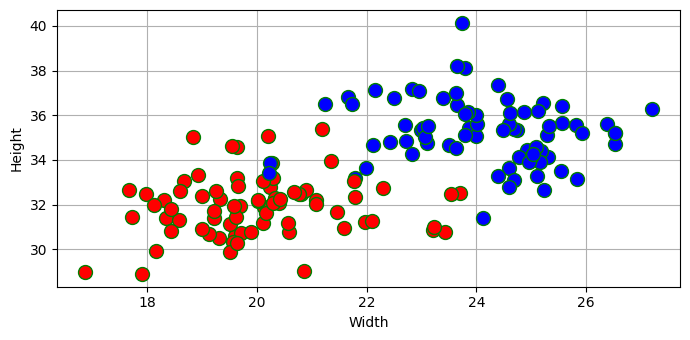

In [182]:
import re
import math
import matplotlib.pyplot as plt

# Open file, read all lines into a list (array)
with open("../Data/datapoints.txt") as FileContents:
    Lines = FileContents.readlines()

Lines.pop(0) # Remove the first line as its not part of our dataset

# Lists for storing the sorted data
# These are also global (to this file) variables which get used by the core functions/methods
# down below. Makes things simpler by not having to parse them all the time.
PokemonWidth = []
PokemonHeight = []
PokemonLabel = []

# Loop over every line
for Line in Lines:
    # Remove all white spaces and new lines("\n") from each line (e.g each index of the list)
    Line = re.sub('[ \n]', '', Line)
    
    # Split data by comma, convert to floats and append to lists
    Width, Height, Label = [eval(string) for string in Line.split(',')]
    
    # Should really be using dictionaries or multi dimentional lists, but keeping things simple.
    PokemonWidth.append(Width)
    PokemonHeight.append(Height)
    PokemonLabel.append(Label)


# Change some settings to make graph look nicer
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid()

# Function/method for plotting the points
def plotPoints():
    # loop through all three lists and do stuff with each datapoint
    for (WList, HList, LList) in zip(PokemonWidth, PokemonHeight, PokemonLabel):
        
        # Color points based on type of pokemon.
        # Sort of a shitty implementation, but gets the job done and is simple
        if LList == 0: Color = "red"
        else: Color = "blue"
        
        # Plot each point
        plt.plot(WList, HList, marker="o", markersize=10, markeredgecolor="green", markerfacecolor=Color)
    
    # Show/draw points.
    # Done outside of loop because we only need to show/draw the graph once, when it's finished.
    plt.show()

# Run the function/method we just created.
plotPoints()